In [1]:
# Import all the stuff we will need
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

from numpy.random import seed
seed(1)

In [2]:
# generate some data, add to df
n = 10000

var_1 = -1 * np.log(np.random.rand(n))
var_2 = -2 * np.log(np.random.rand(n))
var_3 = -3 * np.log(np.random.rand(n))
var_4 = -4 * np.log(np.random.rand(n))

# scale to mean 0, std 1
var_1 = ( var_1 - np.mean(var_1) ) / np.std(var_1)
var_2 = ( var_2 - np.mean(var_2) ) / np.std(var_2)
var_3 = ( var_3 - np.mean(var_3) ) / np.std(var_3)
var_4 = ( var_4 - np.mean(var_4) ) / np.std(var_4)

data = pd.DataFrame({"x1" : var_1,
                     "x2" : var_2,
                     "x3" : var_3,
                     "x4" : var_4
                    })
#data

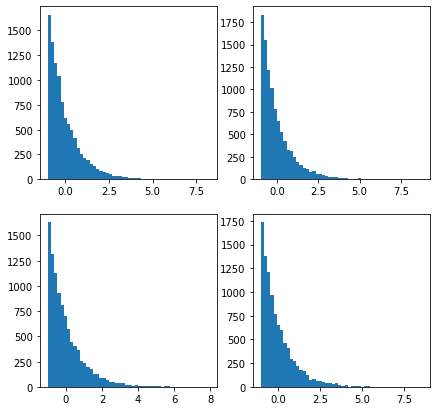

In [3]:
# draw vars
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
bins = 50
_ = axs[0, 0].hist(data.x1, bins = bins)
_ = axs[0, 1].hist(data.x2, bins = bins)
_ = axs[1, 0].hist(data.x3, bins = bins)
_ = axs[1, 1].hist(data.x4, bins = bins)

In [4]:
# split into training and testing data, 70% fraction
# will split test into validation during model training
split = int(0.7 * len(data))
train = data[0:split].values
test  = data[split:].values

In [5]:
# setup autoencoder, we will use a NN with 4 - 3 - 2 - 3 - 4 to encode and decode our data
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(4, activation='linear'))

model.summary()

learning_rate = 0.001 * 2
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

2021-10-31 22:28:44.201021: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 16        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [6]:
epochs = 300

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=train, y=train, batch_size=10, epochs=epochs, validation_split=0.3, callbacks=[es])

2021-10-31 22:28:44.533037: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
490/490 [==============================] - 2s 3ms/step - loss: 0.7906 - mse: 0.7906 - val_loss: 0.5839 - val_mse: 0.5839
Epoch 2/300
490/490 [==============================] - 0s 969us/step - loss: 0.5493 - mse: 0.5493 - val_loss: 0.5176 - val_mse: 0.5176
Epoch 3/300
490/490 [==============================] - 0s 977us/step - loss: 0.5219 - mse: 0.5219 - val_loss: 0.5103 - val_mse: 0.5103
Epoch 4/300
490/490 [==============================] - 0s 862us/step - loss: 0.5164 - mse: 0.5164 - val_loss: 0.5085 - val_mse: 0.5085
Epoch 5/300
490/490 [==============================] - 1s 1ms/step - loss: 0.5148 - mse: 0.5148 - val_loss: 0.5093 - val_mse: 0.5093
Epoch 6/300
490/490 [==============================] - 0s 988us/step - loss: 0.5134 - mse: 0.5134 - val_loss: 0.5083 - val_mse: 0.5083
Epoch 7/300
490/490 [==============================] - 1s 1ms/step - loss: 0.5128 - mse: 0.5128 - val_loss: 0.5092 - val_mse: 0.5092
Epoch 8/300
490/490 [==============================] - 1s 2ms

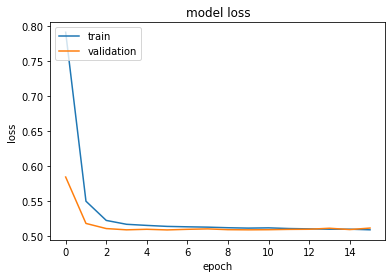

In [7]:
# learning curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.gca().set_yscale("log")
plt.show()

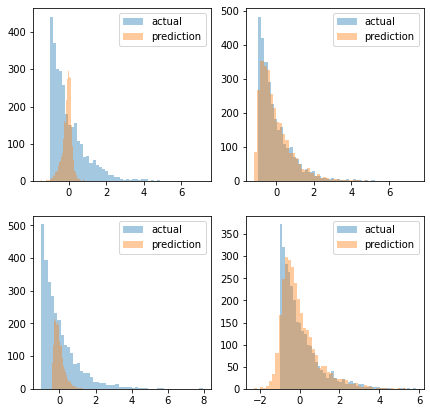

In [8]:
# predictions
pred = model.predict(test)

# draw vars
nbins = 50
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
_ = axs[0, 0].hist(test[:,0], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[0, 0].hist(pred[:,0], bins = nbins, alpha = 0.4, label = "prediction")
axs[0, 0].legend()

_ = axs[0, 1].hist(test[:,1], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[0, 1].hist(pred[:,1], bins = nbins, alpha = 0.4, label = "prediction")
axs[0, 1].legend()

_ = axs[1, 0].hist(test[:,2], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[1, 0].hist(pred[:,2], bins = nbins, alpha = 0.4, label = "prediction")
axs[1, 0].legend()

_ = axs[1, 1].hist(test[:,3], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[1, 1].hist(pred[:,3], bins = nbins, alpha = 0.4, label = "prediction")
axs[1, 1].legend()